# Supreme Court Justices- Roberts Court

## Link: https://www.kaggle.com/rlweath/supreme-court-demographic-database
### Note: I modified the dataset linked above to reflect only the members of the ["Roberts Court"](https://www.oyez.org/courts?court=Roberts%20Court)

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
from scipy import stats
import datetime

UsageError: Line magic function `%` not found.


In [2]:
# import csv

roberts_court = pd.read_csv("/Users/baraazekeria/JN/Supreme Court/roberts_court.csv")

## Data Cleaning

In [3]:
roberts_court

,name,birth_date,birth_st,gender,race,religion,state,party,president,senate_aye,senate_nay,term_start,term_end,death_date
0,John Paul Stevens,1920-04-20,IL,M,White,Protestant,IL,Republican,Gerald Ford,98,0,1975-12-19,2010-06-30,2019-07-16
1,Sandra Day O’Conner,1930-03-26,TX,F,White,Episcopalian,AZ,Republican,Ronald Reagan,99,0,1981-09-25,2006-01-31,NaN
2,Antonin Scalia,1936-03-11,NJ,M,White,Roman Catholic,VA,Republican,Ronald Reagan,98,0,1986-09-26,2016-02-13,2016-02-13
3,Anthony Kennedy,1936-07-23,CA,M,White,Roman Catholic,CA,Republican,Ronald Reagan,97,0,1988-02-18,2018-07-31,NaN
4,David Souter,1939-09-17,MA,M,White,Episcopalian,NH,Republican,George H.W. Bush,90,9,1990-10-09,2009-06-30,NaN
5,Clarence Thomas,1948-06-23,GA,M,Black,Roman Catholic,GA,Republican,George H.W. Bush,52,48,1991-10-23,NaN,NaN
6,Ruth Bader Ginsburg,1933-03-15,NY,F,White,Jewish,NY,Democrat,Bill Clinton,96,3,1993-08-10,2020-09-18,2020-09-18
7,Stephen Breyer,1938-08-15,CA,M,White,Jewish,MA,Democrat,Bill Clinton,87,9,1994-08-03,NaN,NaN
8,John Roberts,1955-01-27,NY,M,White,Roman Catholic,MD,Republican,George W. Bush,78,22,2005-09-29,NaN,NaN
9,Samuel Alito,1950-04-01,NJ,M,White,Roman Catholic,NJ,Republican,George W. Bush,58,42,2006-01-31,NaN,NaN


### The dataset includes a "party" column. Given that Judges are Judges,  not politicians, let's rename the column and the values within it

In [4]:
roberts_court2 = roberts_court.rename(columns = {"party": "ideology"})
roberts_court2["ideology"].replace({"Republican": "Conservative", "Democrat": "Liberal"}, inplace=True)
roberts_court2

,name,birth_date,birth_st,gender,race,religion,state,ideology,president,senate_aye,senate_nay,term_start,term_end,death_date
0,John Paul Stevens,1920-04-20,IL,M,White,Protestant,IL,Conservative,Gerald Ford,98,0,1975-12-19,2010-06-30,2019-07-16
1,Sandra Day O’Conner,1930-03-26,TX,F,White,Episcopalian,AZ,Conservative,Ronald Reagan,99,0,1981-09-25,2006-01-31,NaN
2,Antonin Scalia,1936-03-11,NJ,M,White,Roman Catholic,VA,Conservative,Ronald Reagan,98,0,1986-09-26,2016-02-13,2016-02-13
3,Anthony Kennedy,1936-07-23,CA,M,White,Roman Catholic,CA,Conservative,Ronald Reagan,97,0,1988-02-18,2018-07-31,NaN
4,David Souter,1939-09-17,MA,M,White,Episcopalian,NH,Conservative,George H.W. Bush,90,9,1990-10-09,2009-06-30,NaN
5,Clarence Thomas,1948-06-23,GA,M,Black,Roman Catholic,GA,Conservative,George H.W. Bush,52,48,1991-10-23,NaN,NaN
6,Ruth Bader Ginsburg,1933-03-15,NY,F,White,Jewish,NY,Liberal,Bill Clinton,96,3,1993-08-10,2020-09-18,2020-09-18
7,Stephen Breyer,1938-08-15,CA,M,White,Jewish,MA,Liberal,Bill Clinton,87,9,1994-08-03,NaN,NaN
8,John Roberts,1955-01-27,NY,M,White,Roman Catholic,MD,Conservative,George W. Bush,78,22,2005-09-29,NaN,NaN
9,Samuel Alito,1950-04-01,NJ,M,White,Roman Catholic,NJ,Conservative,George W. Bush,58,42,2006-01-31,NaN,NaN


## Descriptive Statistics

### Executive Branch

In [5]:
roberts_court2['president'].value_counts()

Ronald Reagan       3
Donald Trump        3
Barack Obama        2
Bill Clinton        2
George H.W. Bush    2
George W. Bush      2
Gerald Ford         1
Name: president, dtype: int64

Text(0, 0.5, 'U.S. President')

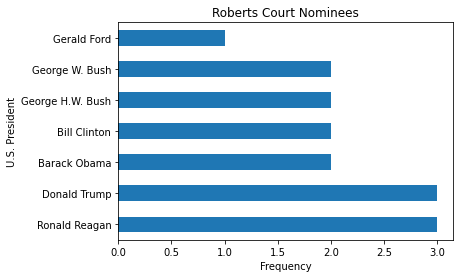

In [6]:
roberts_court2['president'].value_counts().plot(kind = 'barh')
plt.title("Roberts Court Nominees")
plt.xlabel("Frequency")
plt.ylabel("U.S. President")

<AxesSubplot:xlabel='president'>

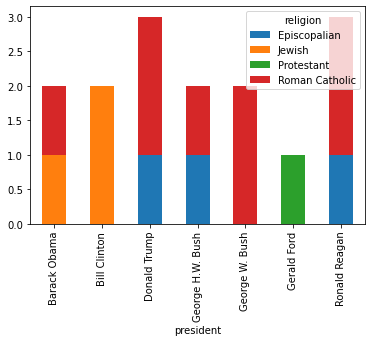

In [7]:
roberts_court2.groupby(['president', 'religion']).size().unstack().plot(kind='bar',stacked=True)


### Legislative Branch

In [8]:
roberts_court2.describe()

,senate_aye,senate_nay
count,15.000000,15.000000
mean,76.000000,22.800000
std,19.871013,20.508535
min,50.000000,0.000000
25%,56.000000,1.500000
50%,78.000000,22.000000
75%,96.500000,43.500000
max,99.000000,48.000000


### Judicial Branch

In [9]:
for i in roberts_court2['name']:
    print(i)

John Paul Stevens
Sandra Day O’Conner
Antonin Scalia
Anthony Kennedy
David Souter
Clarence Thomas
Ruth Bader Ginsburg
Stephen Breyer
John Roberts
Samuel Alito
Sonia Sotomayor
Elena Kagan
Neil Gorsuch
Brett Kavanaugh
Amy Coney Barrett


In [10]:
name_list = roberts_court2['name'].tolist()
gender_list = roberts_court2['gender'].tolist()
race_list = roberts_court2['race'].tolist()
ideology_list = roberts_court2['ideology'].tolist()
president_list = roberts_court2['president'].tolist()

In [11]:
print("Roberts Court Justices Info")
print()
for index, item in enumerate(name_list):
    print("  -", item + ":", gender_list[index] + ",", race_list[index] + ",", ideology_list[index] + ",", 
          "President", president_list[index])
    print()

Roberts Court Justices Info

  - John Paul Stevens: M, White, Conservative, President Gerald Ford

  - Sandra Day O’Conner: F, White, Conservative, President Ronald Reagan

  - Antonin Scalia: M, White, Conservative, President Ronald Reagan

  - Anthony Kennedy: M, White, Conservative, President Ronald Reagan

  - David Souter: M, White, Conservative, President George H.W. Bush

  - Clarence Thomas: M, Black, Conservative, President George H.W. Bush

  - Ruth Bader Ginsburg: F, White, Liberal, President Bill Clinton

  - Stephen Breyer: M, White, Liberal, President Bill Clinton

  - John Roberts: M, White, Conservative, President George W. Bush

  - Samuel Alito: M, White, Conservative, President George W. Bush

  - Sonia Sotomayor: F, Hispanic, Liberal, President Barack Obama

  - Elena Kagan: F, White, Liberal, President Barack Obama

  - Neil Gorsuch: M, White, Conservative, President Donald Trump

  - Brett Kavanaugh: M, White, Conservative, President Donald Trump

  - Amy Coney Ba

In [12]:
roberts_court2['ideology'].value_counts()

Conservative    11
Liberal          4
Name: ideology, dtype: int64